# Determination Of Associate Skills Trait 

***Author : Sharath Vaidyanath***

In [1]:
#Importing Standard libraries for analysis and visualizations 
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data into a dataframe
df = pd.read_csv(r"F:\M.tech\Study Materials\1st Sem Materials\Data Mining\Assignmnets\Assignment 1\Employee_skills_traits.csv")

In [3]:
#Reading the first five entries of the dataframe
df.head(5)

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1


In [4]:
#Reading the summary to get some insights about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   ID                                     998 non-null    int64
 1   Employment period                      998 non-null    int64
 2   Time in current department             998 non-null    int64
 3   Gender                                 998 non-null    int64
 4   Team leader                            998 non-null    int64
 5   Age                                    998 non-null    int64
 6   Member of professional organizations   998 non-null    int64
 7   .Net                                   998 non-null    int64
 8   SQL Server                             998 non-null    int64
 9   HTML CSS Java Script                   998 non-null    int64
 10  PHP mySQL                              998 non-null    int64
 11  Fast working                    

In [5]:
df.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,998.0,9710.248497,5639.386232,235.0,4878.5,9413.0,14619.75,20078.0
Employment period,998.0,10.388778,5.787715,1.0,5.0,10.0,15.00,20.0
Time in current department,998.0,5.660321,3.196953,1.0,3.0,5.0,8.00,12.0
Gender,998.0,0.484970,0.500025,0.0,0.0,0.0,1.00,1.0
Team leader,998.0,0.504008,0.500235,0.0,0.0,1.0,1.00,1.0
Age,998.0,40.441884,8.059964,24.0,34.0,40.0,47.00,55.0
Member of professional organizations,998.0,0.489980,0.500150,0.0,0.0,0.0,1.00,1.0
.Net,998.0,0.476954,0.499719,0.0,0.0,0.0,1.00,1.0
SQL Server,998.0,0.475952,0.499672,0.0,0.0,0.0,1.00,1.0
HTML CSS Java Script,998.0,0.508016,0.500186,0.0,0.0,1.0,1.00,1.0


In [7]:
#Checing for any Null values present at the data
df.isna()

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,False,False,False,False,False,False,False,False,False,False,False,False,False,False
994,False,False,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Performing a correlation analysis between the variables.
df.corr().transpose()

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
ID,1.000000,0.021231,0.045212,-0.002563,0.019724,0.058252,-0.003988,0.033203,0.027852,0.009756,0.001788,0.007470,-0.009040,0.006633
Employment period,0.021231,1.000000,0.495719,0.033907,-0.048001,0.164389,-0.042311,-0.086372,-0.041851,0.050546,0.029320,0.031121,0.016359,-0.080846
Time in current department,0.045212,0.495719,1.000000,0.009666,-0.005733,0.076987,-0.065801,-0.051051,-0.048757,0.005154,0.025756,0.049245,-0.006786,-0.017179
Gender,-0.002563,0.033907,0.009666,1.000000,0.024301,0.010982,-0.008624,-0.027479,-0.045607,0.000482,0.062893,-0.053953,0.024180,-0.024820
Team leader,0.019724,-0.048001,-0.005733,0.024301,1.000000,-0.010266,-0.037924,0.024444,0.002392,-0.034202,0.002360,0.015985,-0.002036,0.107978
Age,0.058252,0.164389,0.076987,0.010982,-0.010266,1.000000,-0.052271,-0.002076,0.001022,-0.008468,0.012754,0.030642,0.022791,-0.007664
Member of professional organizations,-0.003988,-0.042311,-0.065801,-0.008624,-0.037924,-0.052271,1.000000,-0.004938,0.009069,-0.017721,-0.071107,-0.019924,0.010102,0.008869
.Net,0.033203,-0.086372,-0.051051,-0.027479,0.024444,-0.002076,-0.004938,1.000000,0.037948,0.008765,0.001980,-0.001729,-0.019877,-0.052270
SQL Server,0.027852,-0.041851,-0.048757,-0.045607,0.002392,0.001022,0.009069,0.037948,1.000000,0.026858,-0.052332,0.000289,0.034301,-0.070264
HTML CSS Java Script,0.009756,0.050546,0.005154,0.000482,-0.034202,-0.008468,-0.017721,0.008765,0.026858,1.000000,0.002714,-0.000096,0.005949,0.015373


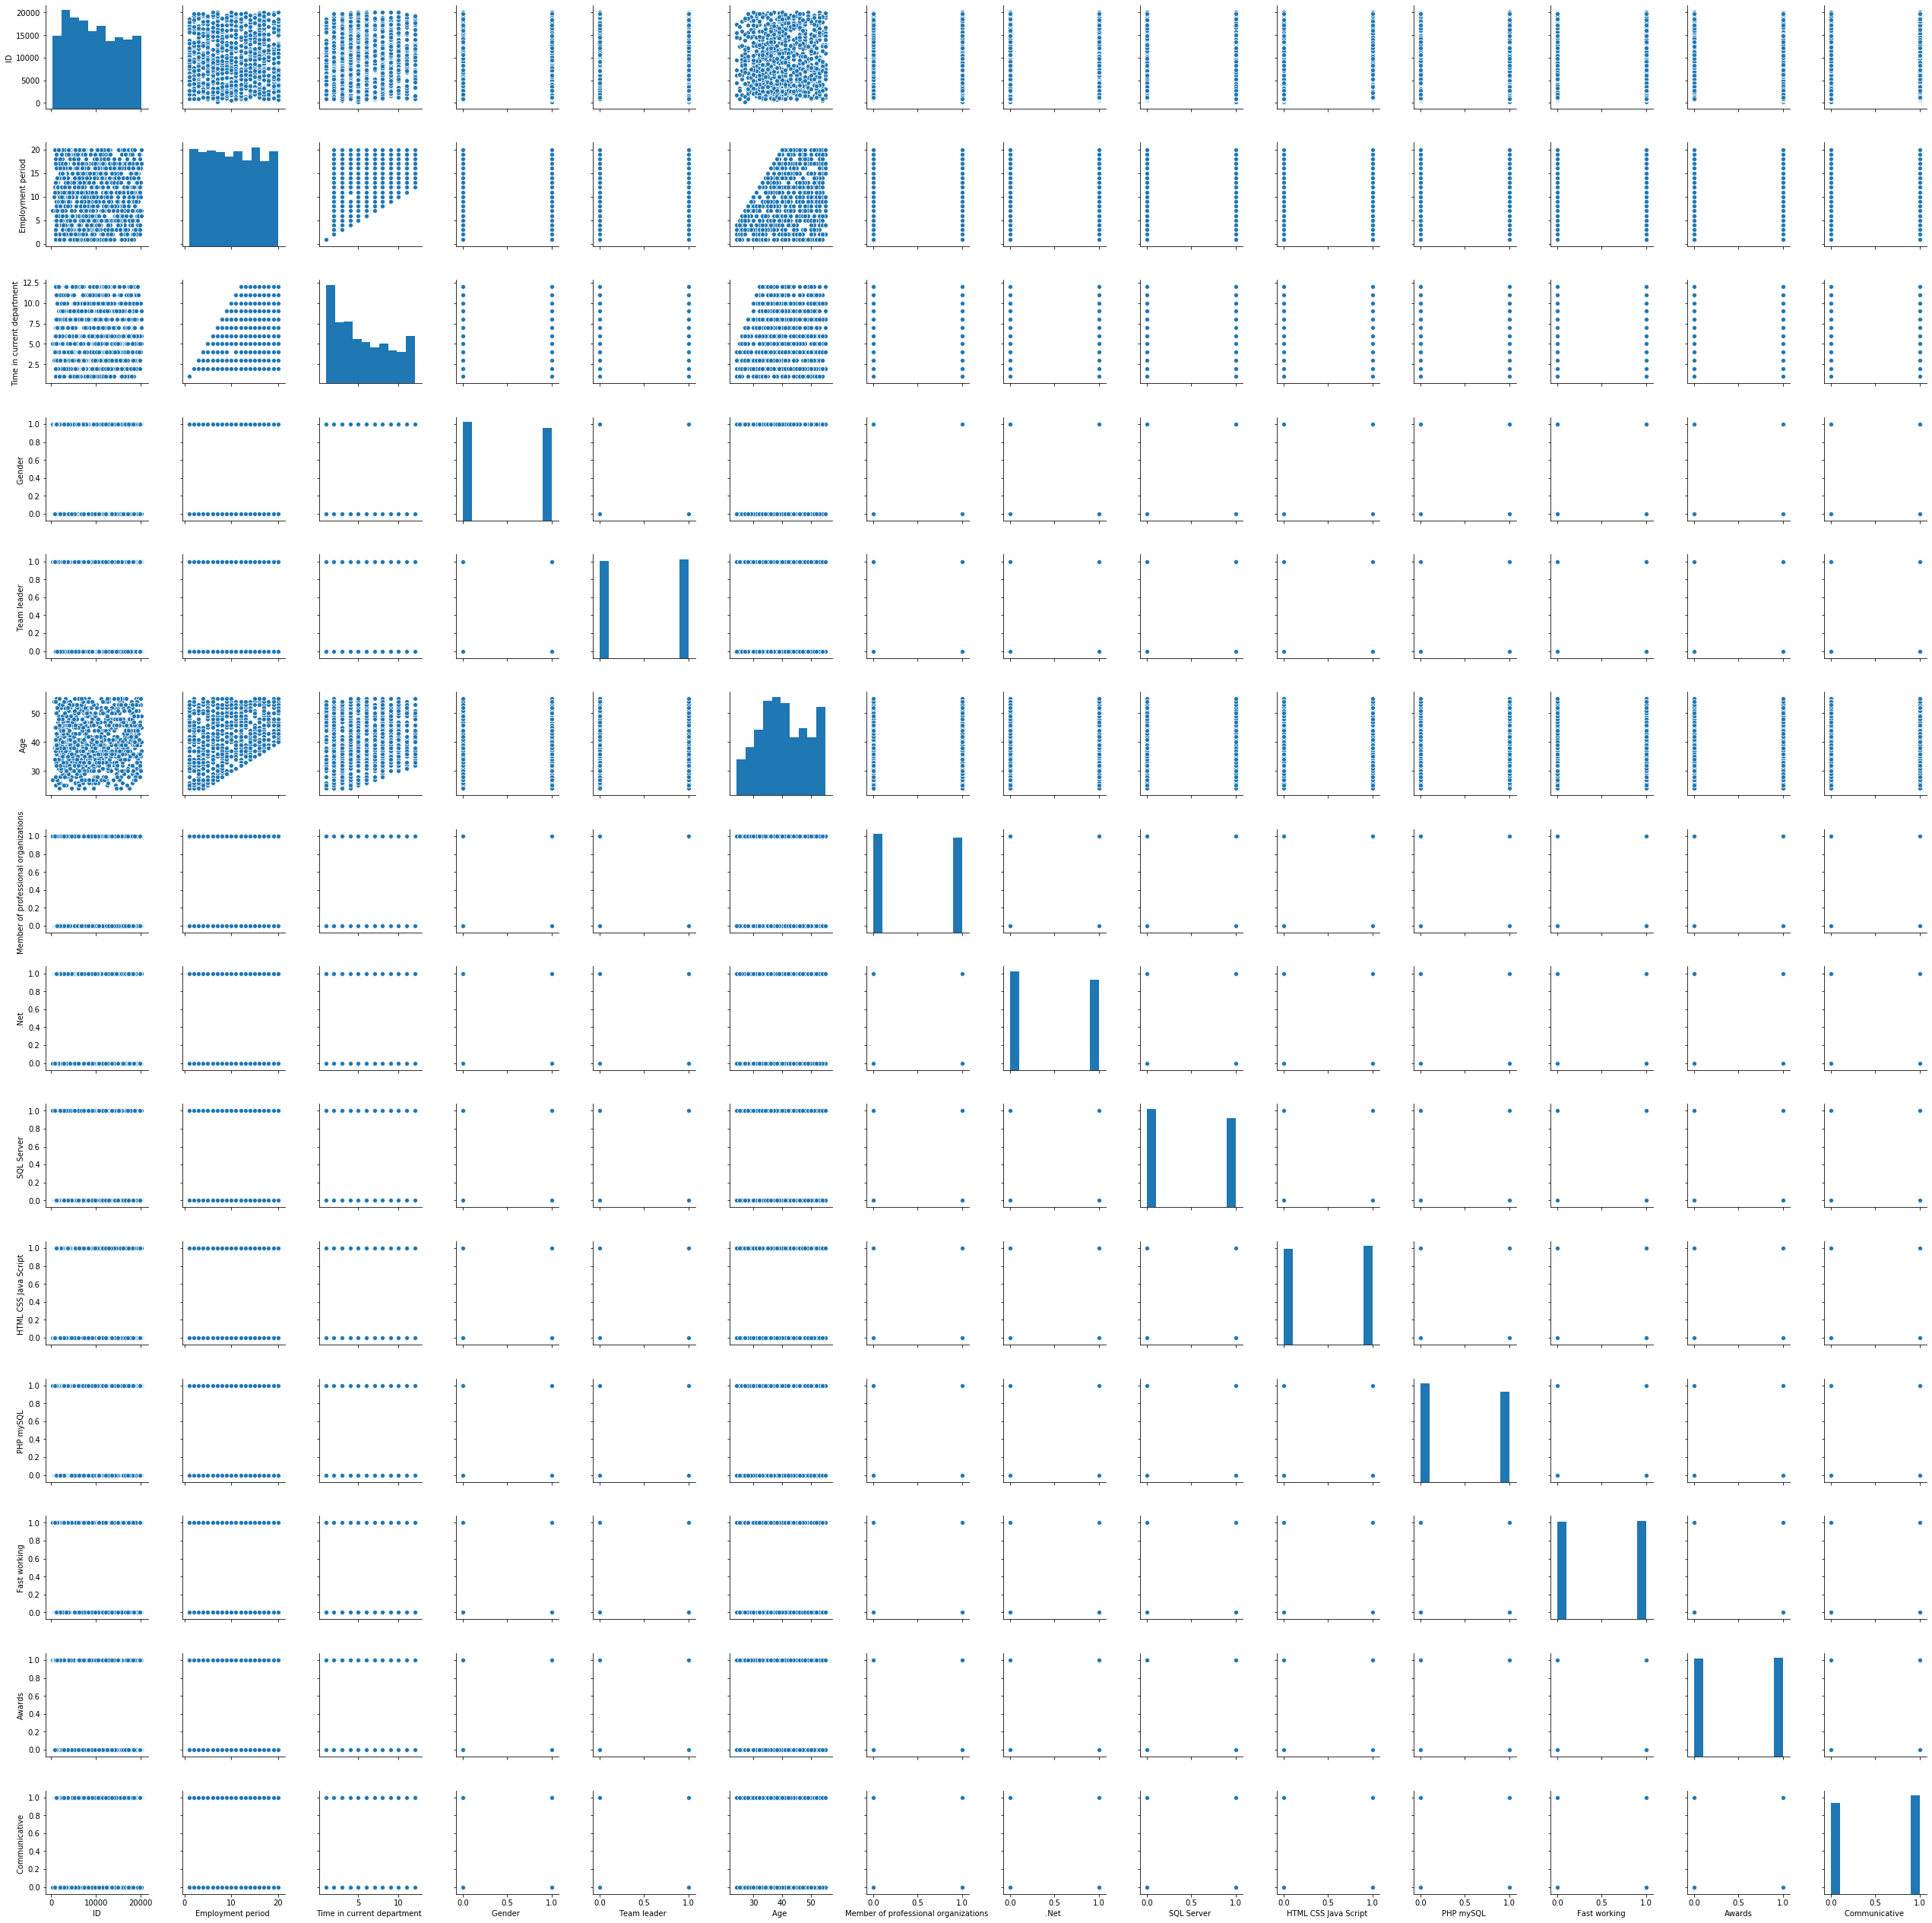

In [9]:
#performing exploratory data analysis
sns.pairplot(df,palette='viridis')

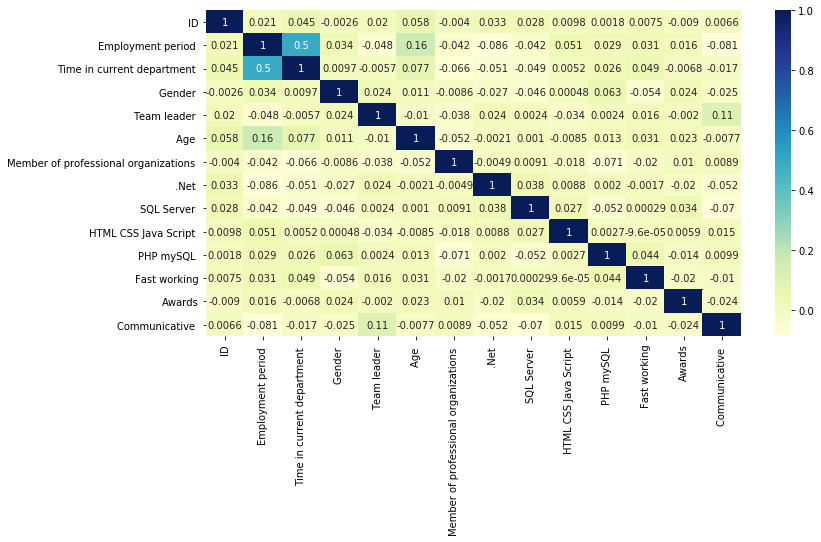

In [10]:
#Visualzing the heatmap for the correlated data
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

From the above, we can see some columns are correlated with other, like 
1. Time in current department and Employment period (Vice-versa)
2. Age and Employment period (Vice-versa)
3. Team leader and Communicative (Vice-versa)

In [11]:
#Loading the data into a dataframe
df = pd.read_csv(r"F:\M.tech\Study Materials\1st Sem Materials\Data Mining\Assignmnets\Assignment 1\Employee_skills_traits.csv")

Dropping the "ID" Column as it is irrelevant to our analysis 

In [12]:
df = df.drop('ID', axis=1)

We normalize the Age,Employment period,Time in Current department based on a certain condition

In [13]:
#Normalizing Age with people less than or equal to 40 as 0 and more than 40 as 1
df.loc[df['Age '] <= 40, 'Age '] = 0
df.loc[df['Age '] > 40, 'Age '] = 1
#Normalizing Employment period with people less than or equal to 10 as 0 and more than 10 as 1
df.loc[df['Employment period '] <= 10, 'Employment period '] = 0
df.loc[df['Employment period '] > 10, 'Employment period '] = 1
#Normalizing Time in current department with people less than or equal to 5 as 0 and more than 5 as 1
df.loc[df['Time in current department '] <= 5, 'Time in current department '] = 0
df.loc[df['Time in current department '] > 5, 'Time in current department '] = 1

Applying Apriori principle and association rules

In [14]:
freq_items = apriori(df, min_support=0.1, use_colnames=True, verbose=1)
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules

Processing 2452 combinations | Sampling itemset size 4


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Employment period ),(Time in current department ),0.493988,0.462926,0.316633,0.640974,1.384614,0.087953,1.495918
1,(Time in current department ),(Employment period ),0.462926,0.493988,0.316633,0.683983,1.384614,0.087953,1.601216
2,(Employment period ),(Gender ),0.493988,0.484970,0.241483,0.488844,1.007988,0.001914,1.007579
3,(Gender ),(Employment period ),0.484970,0.493988,0.241483,0.497934,1.007988,0.001914,1.007859
4,(Age ),(Employment period ),0.456914,0.493988,0.228457,0.500000,1.012170,0.002747,1.012024
...,...,...,...,...,...,...,...,...,...
893,(Communicative ),"(PHP mySQL , Fast working)",0.521042,0.251503,0.132265,0.253846,1.009317,0.001221,1.003140
894,"(PHP mySQL , Awards)",(Communicative ),0.236473,0.521042,0.126253,0.533898,1.024674,0.003040,1.027582
895,"(Awards, Communicative )",(PHP mySQL ),0.255511,0.477956,0.126253,0.494118,1.033814,0.004130,1.031948
896,(PHP mySQL ),"(Awards, Communicative )",0.477956,0.255511,0.126253,0.264151,1.033814,0.004130,1.011741


In [15]:
freq_items = apriori(df, min_support=0.2, use_colnames=True, verbose=1)
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules

Processing 858 combinations | Sampling itemset size 3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Employment period ),(Time in current department ),0.493988,0.462926,0.316633,0.640974,1.384614,0.087953,1.495918
1,(Time in current department ),(Employment period ),0.462926,0.493988,0.316633,0.683983,1.384614,0.087953,1.601216
2,(Employment period ),(Gender ),0.493988,0.484970,0.241483,0.488844,1.007988,0.001914,1.007579
3,(Gender ),(Employment period ),0.484970,0.493988,0.241483,0.497934,1.007988,0.001914,1.007859
4,(Age ),(Employment period ),0.456914,0.493988,0.228457,0.500000,1.012170,0.002747,1.012024
...,...,...,...,...,...,...,...,...,...
75,(Communicative ),(HTML CSS Java Script ),0.521042,0.508016,0.268537,0.515385,1.014505,0.003839,1.015205
76,(PHP mySQL ),(Fast working),0.477956,0.503006,0.251503,0.526205,1.046122,0.011088,1.048965
77,(Fast working),(PHP mySQL ),0.503006,0.477956,0.251503,0.500000,1.046122,0.011088,1.044088
78,(PHP mySQL ),(Communicative ),0.477956,0.521042,0.251503,0.526205,1.009910,0.002468,1.010898


In [16]:
freq_items = apriori(df, min_support=0.3, use_colnames=True, verbose=1)
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules

Processing 156 combinations | Sampling itemset size 2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Employment period ),(Time in current department ),0.493988,0.462926,0.316633,0.640974,1.384614,0.087953,1.495918
1,(Time in current department ),(Employment period ),0.462926,0.493988,0.316633,0.683983,1.384614,0.087953,1.601216


In [17]:
freq_items = apriori(df, min_support=0.4, use_colnames=True, verbose=1)
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules

Processing 156 combinations | Sampling itemset size 2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [18]:
freq_items = apriori(df, min_support=0.5, use_colnames=True, verbose=1)
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules

Processing 20 combinations | Sampling itemset size 2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Upon iterating the minimum support with percentages 20,30,40 and 50 we saw that the association rules are not getting formed beyond 30%. Hence, using, minumum support of 20% to form association rules. 

When min_support = 0.2 and min_threshold = 1

In [19]:
freq_items = apriori(df, min_support=0.2, use_colnames=True, verbose=1)
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules.describe().transpose()

Processing 858 combinations | Sampling itemset size 3


,count,mean,std,min,25%,50%,75%,max
antecedent support,80.0,0.488702,0.018371,0.456914,0.476954,0.489980,0.503257,0.521042
consequent support,80.0,0.488702,0.018371,0.456914,0.476954,0.489980,0.503257,0.521042
support,80.0,0.246092,0.017428,0.219439,0.236473,0.245491,0.250752,0.316633
confidence,80.0,0.503752,0.033579,0.459566,0.482633,0.500000,0.514693,0.683983
lift,80.0,1.030972,0.060837,1.000302,1.008504,1.013338,1.036249,1.384614
leverage,80.0,0.007312,0.014026,0.000072,0.002021,0.003132,0.008083,0.087953
conviction,80.0,1.035162,0.086325,1.000274,1.007953,1.012892,1.033432,1.601216


In [20]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Employment period ),(Time in current department ),0.493988,0.462926,0.316633,0.640974,1.384614,0.087953,1.495918
1,(Time in current department ),(Employment period ),0.462926,0.493988,0.316633,0.683983,1.384614,0.087953,1.601216
2,(Employment period ),(Gender ),0.493988,0.484970,0.241483,0.488844,1.007988,0.001914,1.007579
3,(Gender ),(Employment period ),0.484970,0.493988,0.241483,0.497934,1.007988,0.001914,1.007859
4,(Age ),(Employment period ),0.456914,0.493988,0.228457,0.500000,1.012170,0.002747,1.012024
5,(Employment period ),(Age ),0.493988,0.456914,0.228457,0.462475,1.012170,0.002747,1.010345
6,(Employment period ),(HTML CSS Java Script ),0.493988,0.508016,0.265531,0.537525,1.058087,0.014577,1.063807
7,(HTML CSS Java Script ),(Employment period ),0.508016,0.493988,0.265531,0.522682,1.058087,0.014577,1.060116
8,(PHP mySQL ),(Employment period ),0.477956,0.493988,0.246493,0.515723,1.044000,0.010389,1.044882
9,(Employment period ),(PHP mySQL ),0.493988,0.477956,0.246493,0.498986,1.044000,0.010389,1.041975


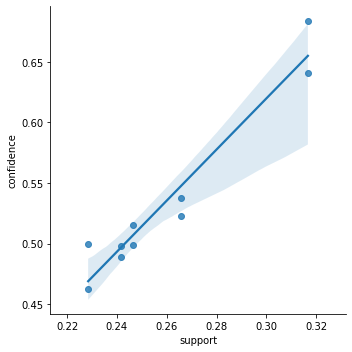

In [21]:
z = rules.head(10)
sns.lmplot(x='support',y='confidence',data=z)

C:\Users\Sharath Vaidyanath\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sharath Vaidyanath\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sharath Vaidyanath\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sharath Vaidyanath\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sharath Vaidyanath\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sharath Vaidyana

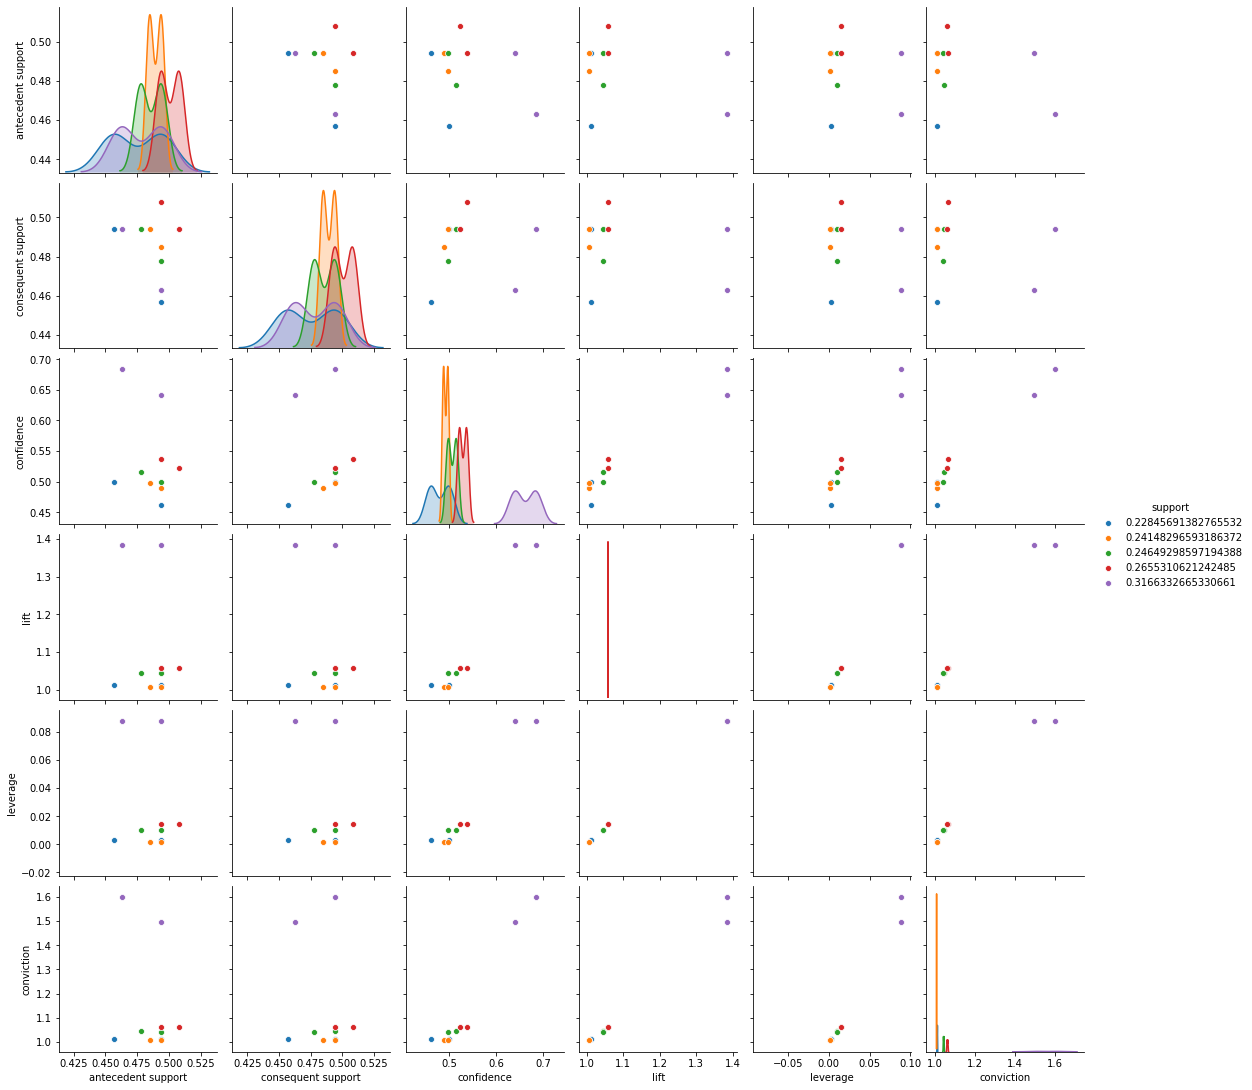

In [22]:
sns.pairplot(z,hue='support')

In [23]:
rules.corr()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
antecedent support,1.000000,-0.150477,0.388416,-0.151987,-0.078470,-0.061291,-0.089080
consequent support,-0.150477,1.000000,0.388416,0.494822,-0.078470,-0.061291,-0.047492
support,0.388416,0.388416,1.000000,0.851000,0.724622,0.743174,0.726223
confidence,-0.151987,0.494822,0.851000,1.000000,0.826944,0.836320,0.838341
lift,-0.078470,-0.078470,0.724622,0.826944,1.000000,0.999115,0.990927
leverage,-0.061291,-0.061291,0.743174,0.836320,0.999115,1.000000,0.988726
conviction,-0.089080,-0.047492,0.726223,0.838341,0.990927,0.988726,1.000000


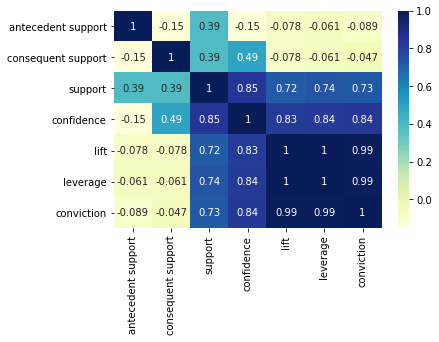

In [24]:
sns.heatmap(rules.corr(),annot=True,cmap='YlGnBu')

In [25]:
rules[rules['support'] == rules['support'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Employment period ),(Time in current department ),0.493988,0.462926,0.316633,0.640974,1.384614,0.087953,1.495918
1,(Time in current department ),(Employment period ),0.462926,0.493988,0.316633,0.683983,1.384614,0.087953,1.601216


Thus, its clear that employemnt period and Time at the current department has highiest support and hence, the time the employee spends in the company is mainly the time spent at current department. Hence, the company should take these parameters as the key, for refining their resources

In [26]:
rules[rules['support'] == rules['support'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(Age ),(Time in current department ),0.456914,0.462926,0.219439,0.480263,1.037452,0.007922,1.033358
15,(Time in current department ),(Age ),0.462926,0.456914,0.219439,0.474026,1.037452,0.007922,1.032534


Thus, the Age and Time at the current department has least support and hence, the time the employee spends in the current department and age ,is least significant among the variables . Hence, the company can rule out this parameter for refining their resources

In [27]:
rules[rules['confidence'] == rules['confidence'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Time in current department ),(Employment period ),0.462926,0.493988,0.316633,0.683983,1.384614,0.087953,1.601216


In [28]:
rules[rules['confidence'] == rules['confidence'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43,(HTML CSS Java Script ),(Age ),0.508016,0.456914,0.233467,0.459566,1.005805,0.001347,1.004908


In [29]:
rules[rules['lift'] == rules['lift'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Employment period ),(Time in current department ),0.493988,0.462926,0.316633,0.640974,1.384614,0.087953,1.495918
1,(Time in current department ),(Employment period ),0.462926,0.493988,0.316633,0.683983,1.384614,0.087953,1.601216


We can see that the maximum lift ratio is 1.38 for the pair [Time in current department,Employment period]. Hence, 1.38 times the number of people staying at the current department also have the reason of emplyoment period. This is needed to be studied in detail for further clarity.

In [30]:
rules[rules['lift'] == rules['lift'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,(Fast working),(SQL Server ),0.503006,0.475952,0.239479,0.476096,1.000302,0.000072,1.000274
67,(SQL Server ),(Fast working),0.475952,0.503006,0.239479,0.503158,1.000302,0.000072,1.000306


We can see that the minimum lift ratio is 1 for the pair [SQL Server,Fast working]. Hence, the entities of this pair are independent to each other of support offered.

In [31]:
rules[rules['conviction'] == rules['conviction'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Time in current department ),(Employment period ),0.462926,0.493988,0.316633,0.683983,1.384614,0.087953,1.601216


The maximum conviction of X (Time in current department) ---> Y (Employment period) is 1.6, states that the probaibilty of employees staying at current deparment is 1.6 times the ones present at employment period.

In [32]:
rules[rules['conviction'] == rules['conviction'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,(Fast working),(SQL Server ),0.503006,0.475952,0.239479,0.476096,1.000302,0.000072,1.000274


Hence,to conclude, the effect of time of an employee in current department and employment period, has a significant impact in various aspects of the company. Hence, We recommend the HR to encourage in work that can increase the time at current department, thereby to see an increase in overall performance and growth of the company